# DS-SF-36 | 05 | Exploratory Data Analysis | Assignment | Starter Code

## Exploratory Data Analysis on the Advertising Dataset

You've been hired as a Data Science Consultant to provide advice to a client on how to improve sales of a particular product.  This client provided you with a dataset (the `Advertising` Dataset) consisting of the `Sales` of that product (in thousands
of units) in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `Radio`, and `Newspaper` (in thousands of dollars).<sup>(*)</sup>

In this assignment, we are going to do some basic exploratory data analysis.  We will revisit this dataset in later assignments.

<sup>(*)</sup> Source: An Introduction to Statistical Learning with Applications in R

In [2]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-advertising-starter.csv'))

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


> ### Question 1.  Make some boxplots!
> E.g., `df[ ['column(s) of interest'] ].plot(kind = 'box')`

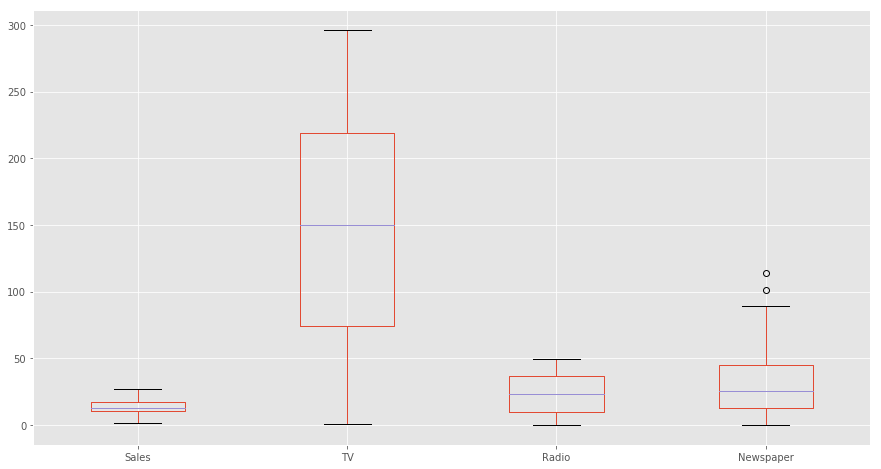

In [11]:
df[['Sales','TV','Radio','Newspaper']].plot(kind='box', figsize = (15,8))

In [6]:
df.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64

> ### Question 2.  What do we learn from TV, radio, newspaper and sales boxplots?

Answer: Spend the most on TV advertising, with greatest variation.  Newsapper and Radio are about the same, except newspaper has more outliers.  Some outliers outside of newspaper range on the high end - 2 data points. 
TV and Radio look symmetrially distributed with no outliers. Sales is skewed to the right, no outliers.

> ### Question 3.  Let's play with correlation!  Compute the correlation matrix of your data and explain what you've learned from it.  E.g., which variable can depict sales the best?  (TV, radio or newspaper)  What are the highest and lowest correlations?  What did you learn from the correlation matrix?

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Answer: The most highly correlated advertising method with sales is TV at .78.  The least is newspaper at .23.  TV can predict sales the best.
TV has a low correlation wtih Radio and Newspaper.

## Let's get rid of outliers!

Directions:

1. Look over your boxplots and pick one variable that likely has outliers.
2. Find the Interquartile Range (IQR) of that variable.  You can do this in two different ways.
  - Use `df.describe()`
  - Use `df.quantile()`
3. Remember, one definition for outliers is anything that is more than `1.5 * IQR` above Q3 or `1.5 * IQR` below Q1.
4. Delete the rows for these outliers.

> ### Question 4.  Step 1:  Which variable seems to have outliers?

Answer: Newspaper, 2 outliers visible on boxplot.

> ### Question 5.  Step 2: Compute the IQR

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


IQR for Newspaper is 12.75 to 45.1.  

In [26]:
Q1= df.Newspaper.quantile(.25)
Q3= df.Newspaper.quantile(.75)

IQR = Q3-Q1
IQR

32.35

> ### Question 6.  Steps 3 and 4: Remove the outliers

In [32]:
print df.shape[0]
print df.shape[1]

200
4


In [34]:
df[df.Newspaper < Q1-1.5*IQR].shape[0]

0

In [36]:
df[df.Newspaper > Q3+1.5*IQR].shape[0]

2

In [37]:
df[df.Newspaper > Q3+1.5*IQR]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [38]:
df.drop(df[df.Newspaper > Q3 +1.5*IQR].index, inplace = True)

In [39]:
df.shape[0]

198

> ### Question 7.  Your last mission!  Our goal is to divide our dataset to high and low sales.  We would like to add a binary variable called `Sales_High` which is 1 if sales of that specific observation is above the median of all sales and 0 otherwise.

In [41]:
threshold = df.Sales.median()
threshold

12.9

In [44]:
df['Sales_High'] = df.Sales.apply(lambda sales: sales > threshold * 1.)

> ### Question 8.  Save the dataset as `dataset-05-advertising.csv` in the `datasets` folder.

In [52]:
df.to_csv(os.path.join('..', 'datasets','<dataset-05-advertising.csv>'))